# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [9]:
ords_prods_merged=pd.read_pickle(r'C:\Users\eniad\Downloads\Instacart Basket Analysis\02 Data\prepared data\orders_products_merged_updated.pkl')

In [3]:
ords_prods_merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,busiest_day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,aferage_price,average_price,median_prior_order,order_frequency_flag
0,2539329,1,prior,1,2,8,6.0,196,1,0,...,Regularly busy,Regular days,Average orders,10,New customer,Low spender,5.813559,6.367797,6.0,Frequent customer
1,2398795,1,prior,2,3,7,6.0,196,1,1,...,Regularly busy,Lowest days,Average orders,10,New customer,Low spender,5.813559,6.367797,6.0,Frequent customer
2,473747,1,prior,3,3,12,6.0,196,1,1,...,Regularly busy,Lowest days,Most orders,10,New customer,Low spender,5.813559,6.367797,6.0,Frequent customer
3,2254736,1,prior,4,4,7,6.0,196,1,1,...,Least busy,Lowest days,Average orders,10,New customer,Low spender,5.813559,6.367797,6.0,Frequent customer
4,431534,1,prior,5,4,15,6.0,196,1,1,...,Least busy,Lowest days,Most orders,10,New customer,Low spender,5.813559,6.367797,6.0,Frequent customer


<Axes: >

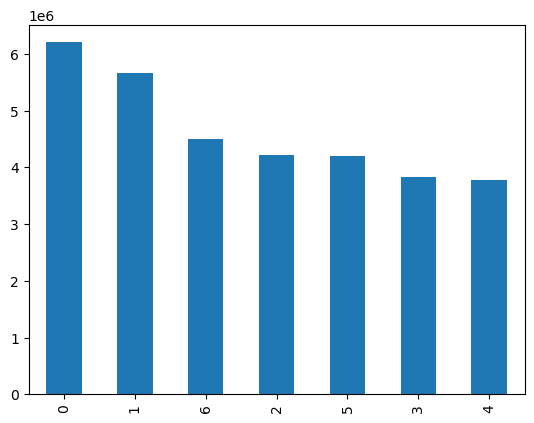

In [4]:
# Create a bar chart
ords_prods_merged['orders_day_of week'].value_counts().plot.bar()

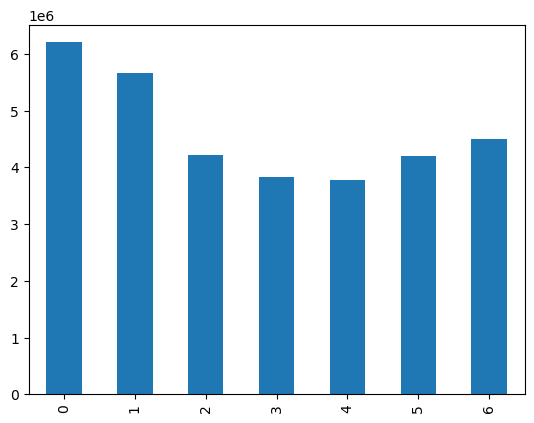

In [5]:
bar=ords_prods_merged['orders_day_of week'].value_counts().sort_index().plot.bar()

In [6]:
ords_prods_merged['orders_day_of week'].value_counts()

0    6204404
1    5660456
6    4496635
2    4213986
5    4205906
3    3840701
4    3783953
Name: orders_day_of week, dtype: int64

In [7]:
# Reordering column according from smaller to largest
ords_prods_merged['orders_day_of week'].value_counts().sort_index()

0    6204404
1    5660456
2    4213986
3    3840701
4    3783953
5    4205906
6    4496635
Name: orders_day_of week, dtype: int64

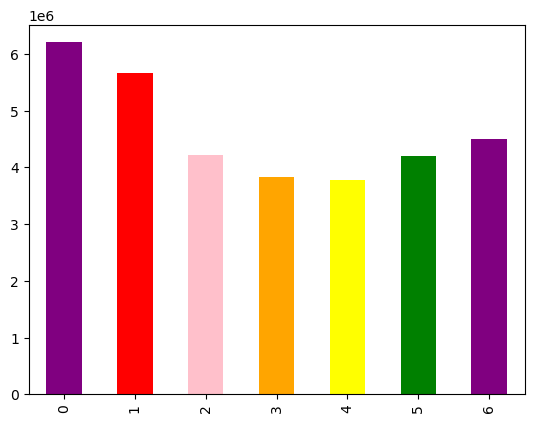

In [8]:
bar=ords_prods_merged['orders_day_of week'].value_counts().sort_index().plot.bar(color=['purple','red','pink','orange','yellow','green'])

Exporting Charts

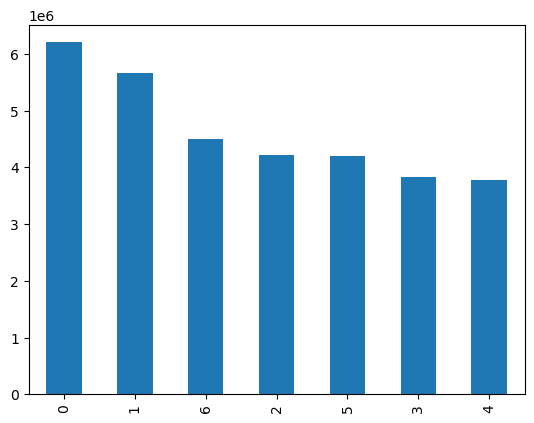

In [9]:
# Create bar 
bar = ords_prods_merged['orders_day_of week'].value_counts().plot.bar()

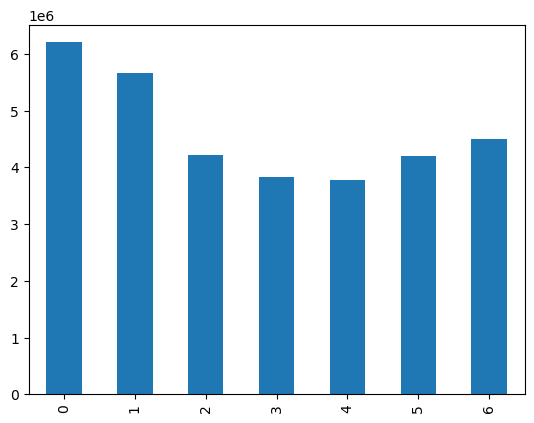

In [10]:
# sort bar from smaller to largest 
bar = ords_prods_merged['orders_day_of week'].value_counts().sort_index().plot.bar()

In [11]:
bar.figure.savefig(r'C:\Users\eniad\Downloads\Instacart Basket Analysis\04 Analysis\Visualizations\bar_orders_dow.png')

##### 3 Historgrams

<Axes: ylabel='Frequency'>

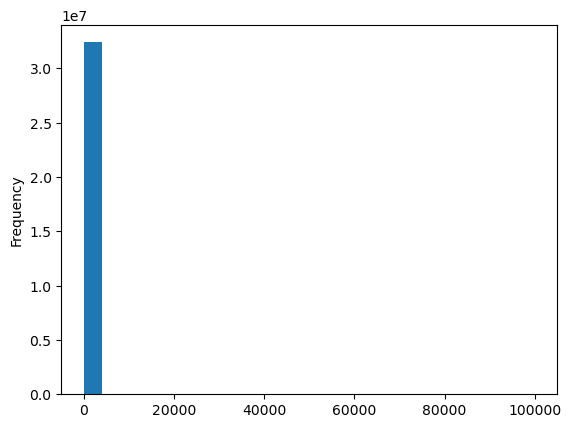

In [12]:
ords_prods_merged['prices'].plot.hist(bins = 25)

Instead of 25bins, a single bar came out. So perform data consistency checks;

In [13]:
# Descriptive statistics
ords_prods_merged['prices'].describe()

count    3.240604e+07
mean     1.198004e+01
std      4.956464e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [14]:
# Investigate further
ords_prods_merged['prices'].mean()

11.980040357290184

In [15]:
ords_prods_merged['prices'].median()

7.4

In [16]:
ords_prods_merged['prices'].max()

99999.0

There is 12 and 7 for mean and median while the maximum is outrageous due to data corruption. The maximum value makes histogram shove all small values into one bar and extreme value into another. 

# Creating Scatter plots

<Axes: xlabel='prices', ylabel='prices'>

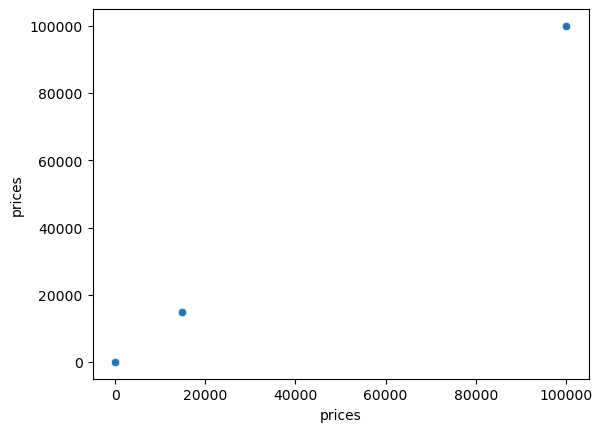

In [17]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merged)

In [18]:
ords_prods_merged.loc[ords_prods_merged['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,busiest_day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,aferage_price,average_price,median_prior_order,order_frequency_flag
10030345,912404,17,prior,12,2,14,21.0,21553,5,0,...,Regularly busy,Regular days,Most orders,40,Loyal customer,NaN,21.006803,108.648299,21.0,NaN
10030346,603376,17,prior,22,6,16,21.0,21553,3,1,...,Regularly busy,Regular days,Most orders,40,Loyal customer,NaN,21.006803,108.648299,21.0,NaN
10030347,3264360,135,prior,2,2,21,3.0,21553,6,0,...,Regularly busy,Regular days,Average orders,4,Loyal customer,Low spender,2.923077,1154.792308,3.0,Frequent customer
10030348,892534,135,prior,3,0,8,3.0,21553,3,1,...,Busiest day,Busiest days,Average orders,4,Loyal customer,Low spender,2.923077,1154.792308,3.0,Frequent customer
10030349,229704,342,prior,8,1,19,8.0,21553,9,0,...,Regularly busy,Busiest days,Average orders,16,Loyal customer,NaN,8.323741,114.426619,8.0,Frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29167287,2249946,204099,prior,29,0,8,19.0,33664,1,0,...,Busiest day,Busiest days,Average orders,39,Loyal customer,NaN,19.681319,1106.743956,19.0,Regular customer
29167288,2363282,204099,prior,31,0,9,19.0,33664,1,1,...,Busiest day,Busiest days,Most orders,39,Loyal customer,NaN,19.681319,1106.743956,19.0,Regular customer
29167289,3181945,204395,prior,13,3,15,8.0,33664,25,0,...,Regularly busy,Lowest days,Most orders,15,Loyal customer,NaN,7.845133,451.153540,8.0,Frequent customer
29167290,2486215,205227,prior,7,3,20,7.0,33664,8,0,...,Regularly busy,Lowest days,Average orders,12,Loyal customer,NaN,6.567251,1178.381871,7.0,Frequent customer


In [19]:
ords_prods_merged.loc[ords_prods_merged['prices'] >100, 'prices'] = np.nan

In [20]:
ords_prods_merged['prices'].max()

25.0

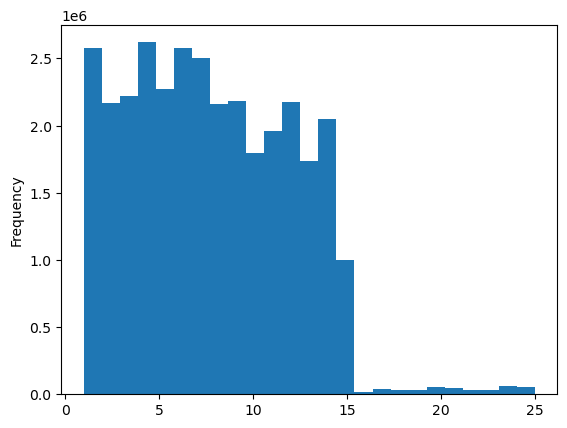

In [21]:
hist=ords_prods_merged['prices'].plot.hist(bins=25)

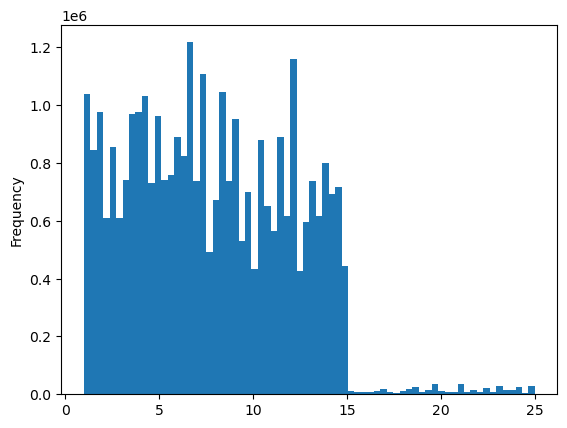

In [22]:
hist_2=ords_prods_merged['prices'].plot.hist(bins=70)

Exporting Histogram

In [23]:
hist.figure.savefig(r'C:\Users\eniad\Downloads\Instacart Basket Analysis\04 Analysis\Visualizations\hist_orders_dow.png')

# Creating line charts

In [3]:
np.random.seed(4)

In [10]:
dev = np.random.rand(len(ords_prods_merged)) <= 0.7

In [11]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [12]:
np.random.rand(10)

array([0.14652875, 0.19185561, 0.99657905, 0.59139971, 0.45592832,
       0.56184089, 0.40007843, 0.31079573, 0.35588093, 0.63298758])

In [16]:
big = ords_prods_merged[dev]

In [17]:
small = ords_prods_merged[~dev]

In [18]:
# Create a list holding True/False test to np.random.rand()<=0.7
dev = np.random.rand(len(ords_prods_merged)) <= 0.7

In [19]:
# store 70% of the dataframe in the big
big = ords_prods_merged[dev]

In [20]:
# store 30% of the dataframe in the big
small = ords_prods_merged[~dev]

In [21]:
len(ords_prods_merged)

32406041

In [23]:
len(big)+len(small)

32406041

In [27]:
df_2 = small[['orders_day_of week','prices']]

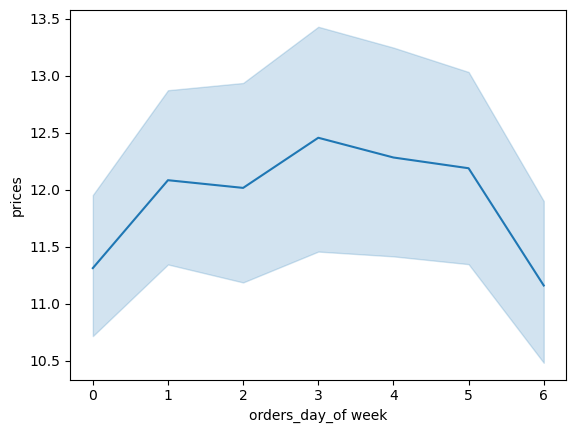

In [29]:
line = sns.lineplot(data = df_2, x = 'orders_day_of week',y = 'prices')

In [30]:
df_4=ords_prods_merged[['orders_day_of week','prices']]

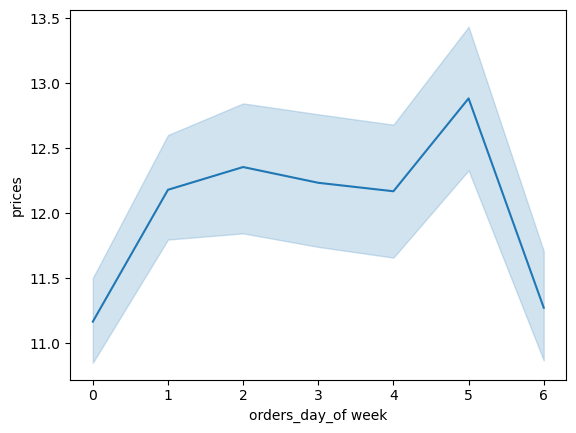

In [40]:
line_2=sns.lineplot(data = df_4, x='orders_day_of week',y ='prices')

In [41]:
line.figure.savefig(r'C:\Users\eniad\Downloads\Instacart Basket Analysis\04 Analysis\Visualizations\line_orders_dow.png')